plt에서 한글을 쓰기 위해 Nanum 설치

In [ ]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
#런타임 다시 실행

NanumBarunGothic


1. 구글 드라이브에 있는 데이터 들고 오기
2. 구글 드라이브에 연동, konlpy을 colab에 적용  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from pandas import Series, DataFrame
!pip3 install JPype1
!pip3 install konlpy
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


크롤링한 음식점 정보와 관광지 csv파일을 받아오고 합친 통합 파일을 가지고 데이터 처리


In [ ]:
comment1 = pd.read_csv('/content/drive/MyDrive/data/food_comment.csv') # 음식점에 대한 댓글 정보
comment2 = pd.read_csv('/content/drive/MyDrive/data/comment_info.csv') # 관광지에 대한 댓글 정보
comment = pd.concat([comment1,comment2], ignore_index = True) # 두 파일을 합치기 

# 데이터를 합쳤을 때 생기는 Unnamed 칼럼 삭제
comment.drop(['Unnamed: 0'], axis = 1, inplace =True)

# 음식점, 관광지에 대한 통합 데이터 파일 생성
comment.to_csv("/content/drive/MyDrive/data/comment.csv", encoding="utf-8-sig", index=True)


print(comment)


       place_name nickname total_comments  avg_rating  rating  \
0             본참치     봄도다리             21         4.0     5.0   
1             본참치        엽            102         3.2     1.0   
2             본참치        ☆             64         3.5     5.0   
3             본참치     워니대디             11         5.0     5.0   
4             본참치    맛집탐방중             59         3.7     5.0   
...           ...      ...            ...         ...     ...   
128559       신라토성      박규식              3         1.3     1.0   
128560       정석농원      정희석              1         4.0     4.0   
128561       정석농원      길옥순              1         5.0     5.0   
128562      두모포진성      박규식              3         1.3     1.0   
128563       매암바위     준서아빠              3         5.0     5.0   

                                                  comment   created_at  
0                                   맛있는 음식으로 끊임 없이 먹여주는 곳  2022.08.22.  
1       캐셔랑 안내해주는 사람은 친절합니다맛은 참치회 말고 소소 합니다 가성비는 좋아요~근...  2022.07.24.  


# 평점 4, 5점을 긍정이라 생각하고 타겟값을 1로 잡고 나머지 평점을 부정이라고 생각하고 타겟값을 0으로 잡고 타겟 데이터를 만들었다.

In [ ]:
comment_target_list = comment['rating'] # 리뷰의 평점
comment_target = []
idx = comment[pd.notnull(comment['comment'])].index # 평점도 있고 텍스트도 있는 리뷰들의 인덱스
comment_1 = 0
comment_2 = 0
comment_3 = 0
comment_4 = 0
comment_5 = 0

for i in idx:
  if comment_target_list[i] == 1:
    comment_1 = comment_1 + 1 
  elif comment_target_list[i] == 2:
    comment_2 = comment_2 + 1 
  elif comment_target_list[i] == 3:
    comment_3 = comment_3 + 1 
  elif comment_target_list[i] == 4:
    comment_4 = comment_4 + 1
    comment_target.append(1)
    continue
  elif comment_target_list[i] == 5:
    comment_5 = comment_5 + 1 
    comment_target.append(1)
    continue
  comment_target.append(0)
print("사용할 전체 리뷰수 : {}".format(len(idx)))
print("comment_1,2,3 : {}".format(comment_1+comment_2+comment_3))
print("comment_4,5 : {}".format(+comment_4+comment_5))
print(comment_target)


사용할 전체 리뷰수 : 106063
comment_1,2,3 : 36428
comment_4,5 : 69635
[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1

댓글에 있는 명사만 뽑아서 all_words 리스트에 넣고 각 댓글의 길이를 word_length에 담았다.

In [ ]:
import konlpy
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt

okt = Okt()

all_words = []
word_length = []
    
for i in idx:
  word_length.append(len(comment['comment'][i])) # 댓글의 길이
  
  words = okt.nouns(comment['comment'][i]) # 해당 댓글의 명사만 추출
  for word in words:
    all_words.append(word) # 뽑은 명사들을 리스트에 추가

모든 리뷰의 길이를 표로 나타내었는데 대부분이 200자를 넘지 않음을 볼 수 있다.

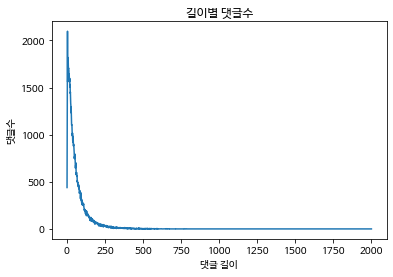

In [ ]:
words_count = Counter(word_length)
plotList = words_count.items()
plotList = sorted(plotList)
x,y = zip(*plotList)

plt.plot(x,y)
plt.xlabel('댓글 길이')
plt.ylabel('댓글수')
plt.title('길이별 댓글수')
plt.show()

all_words 리스트에서 단어의 개수를 조사해 그중에서 가장 많이 쓰는 500개를 뽑았다. (단어는 498개만 뽑았고 패딩값인 1과 뽑은 단어 중에서 없을 때 토큰화할 1을 따로 두었다.)  
이 단어 리스트들을 따로 뽑아서 csv 파일로 만들어서 저장한다. 

In [ ]:
all_word_dic = Counter(all_words).most_common()
word = []
count = []
for i in range(len(all_word_dic)):
  word.append(all_word_dic[i][0])
  count.append(all_word_dic[i][1])


word_data = {'word' : word,
              'count' : count
             }
df = pd.DataFrame(word_data)
df.to_csv("/content/drive/MyDrive/data/word.csv", encoding="utf-8-sig", index=False)

In [ ]:
most_words_500 = word[:498]
most_words_500_dic ={most_words_500[i-2]:i for i in range(2,500)}

print(most_words_500)
print(most_words_500_dic)

['맛', '사장', '진짜', '곳', '가격', '집', '직원', '음식', '정말', '때', '여기', '맛집', '고기', '것', '더', '좀', '최고', '사람', '그냥', '부산', '커피', '주문', '손님', '방문', '분위기', '안', '또', '말', '서비스', '생각', '정도', '별로', '가게', '점', '밥', '하나', '추천', '비', '국물', '기분', '이', '분', '메뉴', '수', '다른', '가성', '양', '시간', '느낌', '요', '처음', '개', '거', '카페', '함', '꼭', '빵', '저', '조금', '다시', '밀면', '왜', '테이블', '번', '포장', '반찬', '돈', '제', '듯', '완전', '뷰', '그', '보고', '자주', '중', '식당', '임', '다음', '국밥', '불친절', '존맛', '리뷰', '장사', '만두', '튀김', '양도', '한번', '음료', '매장', '소스', '최악', '회', '양념', '식사', '앞', '뭐', '일', '친절', '아주', '자리', '가지', '김치', '내', '사진', '재', '전', '기본', '줄', '나', '제일', '배달', '근처', '냄새', '명', '짬뽕', '돈까스', '별', '주차', '추가', '치즈', '계속', '위생', '바로', '인테리어', '매우', '재료', '굿', '물', '때문', '입', '칼국수', '달라', '먹기', '걸', '도', '못', '치킨', '층', '가면', '인분', '직접', '날', '모두', '친구', '김밥', '디저트', '피자', '주인', '알바', '대비', '보통', '파스타', '탕', '오늘', '육수', '항상', '떡볶이', '후기', '면', '밑반찬', '가족', '절대', '게', '개인', '계산', '인', '구이', '데', '향', '입맛', '동네', '만', '요리', '술', '해'

입력층에 넣어주기 위해 빈도수가 높은 상위 500개의 단어가 있으면 따로 번호를 달아주고 없으면 1로 토큰화를 진행한다.

In [ ]:
comment_input = []

print("총 데이터 수 : {}".format(len(idx)))
for i in idx:
  temp = []
  words = okt.nouns(comment['comment'][i]) # 댓글을 명사로 나눔
  for word in words:
    if word in most_words_500_dic:
      temp.append(most_words_500_dic[str(word)]) # 해당하는 단어가 있으면 해당 번호로 라벨링
    else:
      temp.append(1) #해당하는 단어가 없으면 1
  comment_input.append(temp)

comment_input_df = DataFrame({'comment_input' : Series(comment_input),
                              'comment_target' : Series(comment_target)})
comment_input_df.to_csv("/content/drive/MyDrive/data/comment_input.csv", encoding="utf-8-sig", index=False) # 이전까지 했던 작업 저장

총 데이터 수 : 106063


In [ ]:
comment_input = pd.read_csv('/content/drive/MyDrive/data/comment_input.csv') # 작업 불려오기

commentInputList = comment_input['comment_input'].to_list()
commentTargetList = comment_input['comment_target'].to_list() 

#입력층에 맞는 형식으로 만들기 위해 데이터 변형 
for i in range(106063):
  commentInputList[i] = commentInputList[i][1:-1]
  commentInputList[i] = commentInputList[i].split(',')
  if commentInputList[i][0] != '':
    for j in range(len(commentInputList[i])):
      commentInputList[i][j] = int(commentInputList[i][j].strip())
  else:
    commentInputList[i].pop(0)
  
print(commentInputList[:500]) # 댓글들을 라벨링한 결과
print(commentTargetList[:500]) # 해당하는 타겟 값들

[[9, 78, 5], [1, 418, 19, 2, 1, 1, 47, 35, 207, 9, 215, 19, 130, 1, 101, 9, 1, 1, 122, 1, 29, 20, 1], [1, 2, 30, 280, 7, 17, 394, 19, 192], [2, 3, 1, 8, 16], [21, 140, 57, 5], [1, 1, 87, 2], [217, 224, 407], [264, 366, 239, 21, 18, 1, 7], [44, 366, 106, 25, 182], [128], [], [28, 217, 1, 237], [99, 28, 32], [1, 30, 3, 2, 1, 208], [2, 30, 99, 18], [221, 13], [1, 281, 264, 1, 264, 190, 292, 1, 192, 38, 64, 1, 157, 1, 417, 1, 402, 47, 39, 2, 144, 34, 157, 208, 201, 34, 96, 1, 1, 201, 238], [1, 232, 115, 1, 232, 115, 95, 159, 1, 1, 1, 425, 2, 349, 30, 269, 25, 413, 215, 43, 1, 75, 1, 1, 25, 43, 215, 1, 1, 126, 246, 1, 434, 75, 1, 1, 65, 24, 30, 1, 340, 1, 74, 140, 1, 30, 437, 5, 50, 1, 31, 1, 28, 56], [21, 111, 1, 107, 245, 1, 135, 208, 45, 12, 215, 338, 126, 126, 218, 47, 39, 122, 1, 1, 7], [35, 1, 4], [6, 151, 33, 224, 33, 120, 232, 1, 267, 6, 151, 224, 1, 267, 60, 16, 35, 35, 1], [], [1, 393, 143, 1, 217, 1, 1, 1, 193, 215, 43, 1, 9, 1, 126, 1, 1, 9, 29, 100, 217, 1, 6, 151, 366, 100, 47

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


train_input, val_input, train_target, val_target = train_test_split(commentInputList, commentTargetList, test_size=0.3, stratify=commentTargetList)
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)
print(train_seq.shape)


train_target = np.array(train_target)
val_target = np.array(val_target)
train_seq = np.array(train_seq)
val_seq = np.array(val_seq)

(74244, 100)


In [ ]:
print(train_seq)
print(val_seq)

[[  0   0   0 ... 104  94  51]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 276]
 ...
 [  0   0   0 ...   1 102   1]
 [  0   0   0 ...  50 110 341]
 [  0   0   0 ...   0   0   3]]
[[  0   0   0 ...   0   0 465]
 [  0   0   0 ...   1   1   1]
 [  0   0   0 ...   1   1   1]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   1 312 279]
 [  0   0   0 ...   1   1   1]]


In [ ]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb =keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/model/best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,validation_data=(val_seq,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

print('finish')

Epoch 1/100
1161/1161 [==============================] - 110s 93ms/step - loss: 0.6242 - accuracy: 0.6642 - val_loss: 0.6068 - val_accuracy: 0.6726
Epoch 2/100
1161/1161 [==============================] - 107s 92ms/step - loss: 0.5895 - accuracy: 0.6909 - val_loss: 0.5712 - val_accuracy: 0.7111
Epoch 3/100
1161/1161 [==============================] - 107s 92ms/step - loss: 0.5500 - accuracy: 0.7261 - val_loss: 0.5308 - val_accuracy: 0.7436
Epoch 4/100
1161/1161 [==============================] - 108s 93ms/step - loss: 0.5174 - accuracy: 0.7490 - val_loss: 0.4992 - val_accuracy: 0.7699
Epoch 5/100
1161/1161 [==============================] - 107s 92ms/step - loss: 0.4882 - accuracy: 0.7709 - val_loss: 0.4780 - val_accuracy: 0.7797
Epoch 6/100
1161/1161 [==============================] - 106s 92ms/step - loss: 0.4692 - accuracy: 0.7821 - val_loss: 0.4639 - val_accuracy: 0.7886
Epoch 7/100
1161/1161 [==============================] - 107s 92ms/step - loss: 0.4538 - accuracy: 0.7911 - val_

검증 세트와 훈련 세트의 차이가 있음을 확인할 수 있다.

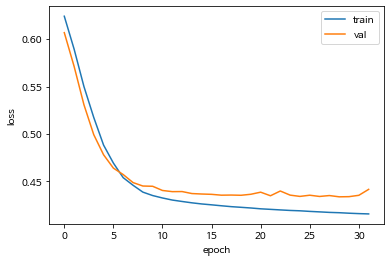

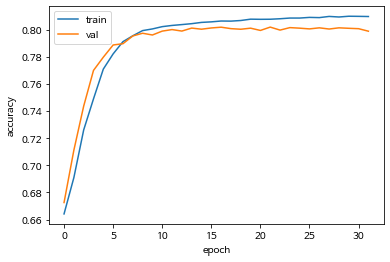

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

simpleRNN 대신 LSTM을 사용하였다 초기는 뉴런 개수를 8개로 설정하였다. 

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb =keras.callbacks.ModelCheckpoint('best-lstm-model2.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history2 = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

print('finish')

Epoch 1/100
1161/1161 [==============================] - 15s 11ms/step - loss: 0.6397 - accuracy: 0.6554 - val_loss: 0.6018 - val_accuracy: 0.6615
Epoch 2/100
1161/1161 [==============================] - 10s 9ms/step - loss: 0.5712 - accuracy: 0.7091 - val_loss: 0.5377 - val_accuracy: 0.7411
Epoch 3/100
1161/1161 [==============================] - 10s 9ms/step - loss: 0.5037 - accuracy: 0.7655 - val_loss: 0.4827 - val_accuracy: 0.7862
Epoch 4/100
1161/1161 [==============================] - 10s 9ms/step - loss: 0.4685 - accuracy: 0.7890 - val_loss: 0.4664 - val_accuracy: 0.7892
Epoch 5/100
1161/1161 [==============================] - 10s 9ms/step - loss: 0.4539 - accuracy: 0.7963 - val_loss: 0.4532 - val_accuracy: 0.7960
Epoch 6/100
1161/1161 [==============================] - 10s 9ms/step - loss: 0.4459 - accuracy: 0.7991 - val_loss: 0.4483 - val_accuracy: 0.7972
Epoch 7/100
1161/1161 [==============================] - 10s 9ms/step - loss: 0.4405 - accuracy: 0.8005 - val_loss: 0.4437 

이전에 비해 검증 세트와 훈련 세트의 차이가 좁혀짐을 볼 수 있다.

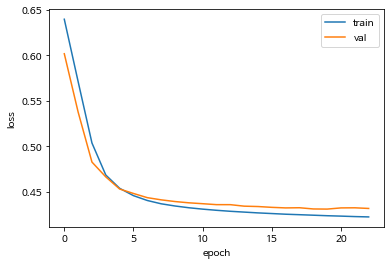

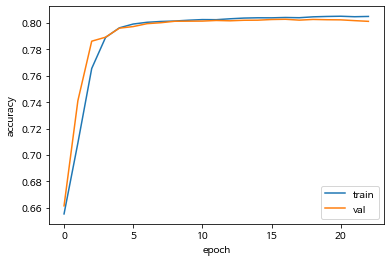

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

모델3에서 lstm층을 하나 더 추가하여 테스트 해보았다.

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb =keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/model/best-lstm-model3.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history3 = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

print('finish')

Epoch 1/100
1161/1161 [==============================] - 23s 15ms/step - loss: 0.6330 - accuracy: 0.6658 - val_loss: 0.6100 - val_accuracy: 0.6962
Epoch 2/100
1161/1161 [==============================] - 16s 14ms/step - loss: 0.5884 - accuracy: 0.7136 - val_loss: 0.5544 - val_accuracy: 0.7374
Epoch 3/100
1161/1161 [==============================] - 16s 14ms/step - loss: 0.5234 - accuracy: 0.7526 - val_loss: 0.5025 - val_accuracy: 0.7662
Epoch 4/100
1161/1161 [==============================] - 16s 14ms/step - loss: 0.4919 - accuracy: 0.7687 - val_loss: 0.4810 - val_accuracy: 0.7714
Epoch 5/100
1161/1161 [==============================] - 16s 14ms/step - loss: 0.4761 - accuracy: 0.7771 - val_loss: 0.4692 - val_accuracy: 0.7777
Epoch 6/100
1161/1161 [==============================] - 16s 13ms/step - loss: 0.4652 - accuracy: 0.7829 - val_loss: 0.4636 - val_accuracy: 0.7800
Epoch 7/100
1161/1161 [==============================] - 16s 13ms/step - loss: 0.4582 - accuracy: 0.7875 - val_loss: 0

정확도는 80프로 정도에 손실함수도 나쁘지 않게 나옴을 볼 수 있다.

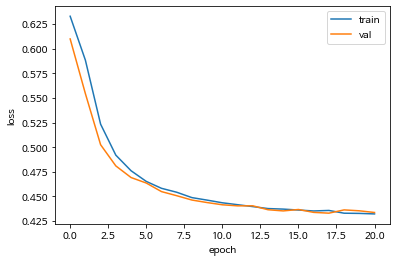

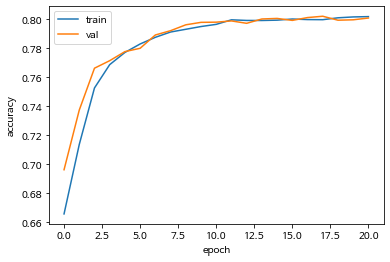

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

이번에는 층을 하나 더 추가하고 뉴런의 개수를 32,16,8로 늘려보았다.

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.LSTM(16, dropout=0.3, return_sequences = True))
model4.add(keras.layers.LSTM(16, dropout=0.3, return_sequences = True))
model4.add(keras.layers.LSTM(16, dropout=0.3))
model4.add(keras.layers.Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 100, 16)           2112      
                                                                 
 lstm_4 (LSTM)               (None, 100, 16)           2112      
                                                                 
 lstm_5 (LSTM)               (None, 16)                2112      
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 14,353
Trainable params: 14,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb =keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/model/best-lstm-model4.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history4 = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

print('finish')

Epoch 1/100
1161/1161 [==============================] - 33s 21ms/step - loss: 0.6277 - accuracy: 0.6701 - val_loss: 0.6130 - val_accuracy: 0.6867
Epoch 2/100
1161/1161 [==============================] - 22s 19ms/step - loss: 0.5878 - accuracy: 0.7099 - val_loss: 0.5429 - val_accuracy: 0.7370
Epoch 3/100
1161/1161 [==============================] - 22s 19ms/step - loss: 0.5224 - accuracy: 0.7521 - val_loss: 0.5025 - val_accuracy: 0.7598
Epoch 4/100
1161/1161 [==============================] - 21s 18ms/step - loss: 0.4930 - accuracy: 0.7679 - val_loss: 0.4856 - val_accuracy: 0.7689
Epoch 5/100
1161/1161 [==============================] - 21s 18ms/step - loss: 0.4739 - accuracy: 0.7799 - val_loss: 0.4641 - val_accuracy: 0.7804
Epoch 6/100
1161/1161 [==============================] - 23s 20ms/step - loss: 0.4619 - accuracy: 0.7881 - val_loss: 0.4526 - val_accuracy: 0.7924
Epoch 7/100
1161/1161 [==============================] - 23s 20ms/step - loss: 0.4524 - accuracy: 0.7940 - val_loss: 0

2개의 층에서 3개의 층으로 늘려도 눈에 띄는 성능 향상은 볼 수 없었다.

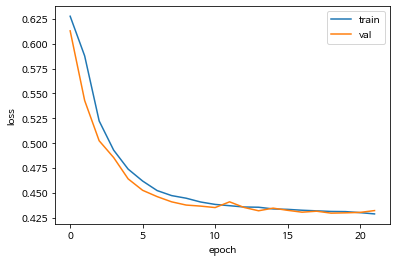

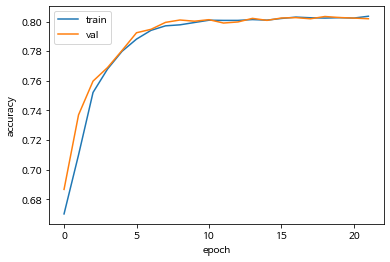

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
model5 = keras.Sequential()
model5.add(keras.layers.Embedding(500, 16, input_length=100))
model5.add(keras.layers.GRU(8, dropout=0.3, return_sequences = True))
model5.add(keras.layers.GRU(8, dropout=0.3))
model5.add(keras.layers.Dense(1, activation='sigmoid'))
model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 100, 8)            624       
                                                                 
 gru_1 (GRU)                 (None, 8)                 432       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,065
Trainable params: 9,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model5.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb =keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/model/best-GRU-model4.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history5 = model5.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

print('finish')

Epoch 1/100
1161/1161 [==============================] - 26s 15ms/step - loss: 0.6760 - accuracy: 0.5773 - val_loss: 0.6519 - val_accuracy: 0.6572
Epoch 2/100
1161/1161 [==============================] - 16s 13ms/step - loss: 0.6099 - accuracy: 0.6820 - val_loss: 0.5523 - val_accuracy: 0.7224
Epoch 3/100
1161/1161 [==============================] - 16s 13ms/step - loss: 0.5346 - accuracy: 0.7275 - val_loss: 0.5175 - val_accuracy: 0.7371
Epoch 4/100
1161/1161 [==============================] - 16s 14ms/step - loss: 0.5172 - accuracy: 0.7375 - val_loss: 0.5052 - val_accuracy: 0.7459
Epoch 5/100
1161/1161 [==============================] - 16s 13ms/step - loss: 0.5094 - accuracy: 0.7428 - val_loss: 0.5026 - val_accuracy: 0.7468
Epoch 6/100
1161/1161 [==============================] - 16s 14ms/step - loss: 0.5048 - accuracy: 0.7456 - val_loss: 0.4970 - val_accuracy: 0.7498
Epoch 7/100
1161/1161 [==============================] - 16s 14ms/step - loss: 0.5010 - accuracy: 0.7487 - val_loss: 0

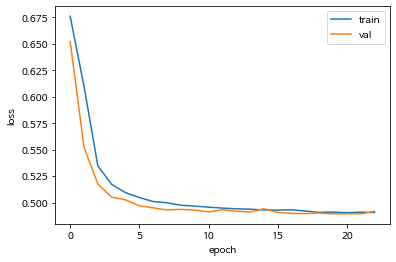

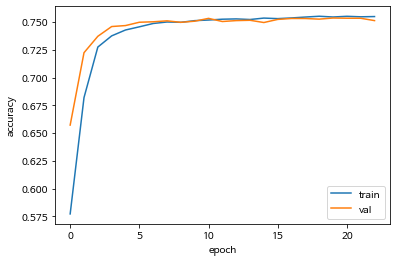

In [ ]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()